In [1]:
import sys
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('..\\scripts'))

from fastai.vision.widgets import *
from helpers import *

In [2]:
batch_size = 16
difficult_data_path = os.path.join(get_data_dir(), "difficult")

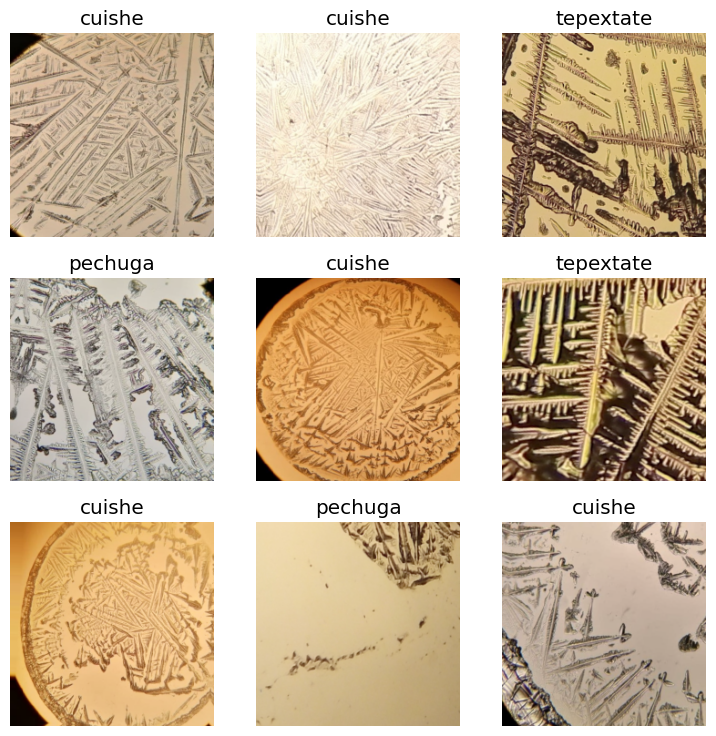

In [3]:
default_data_loader = make_data_loader(difficult_data_path, batch_size)
default_data_loader.train.show_batch()

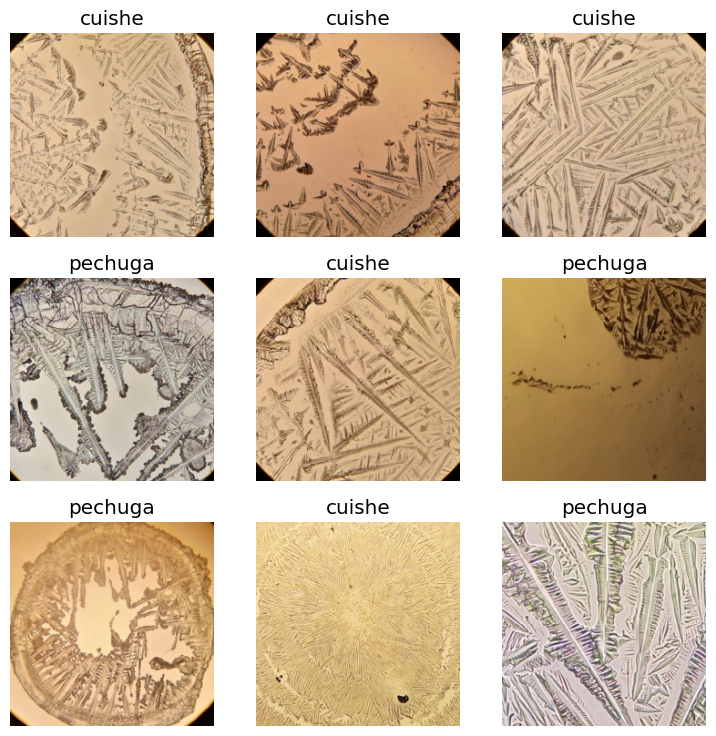

In [4]:
default_data_loader.valid.show_batch()

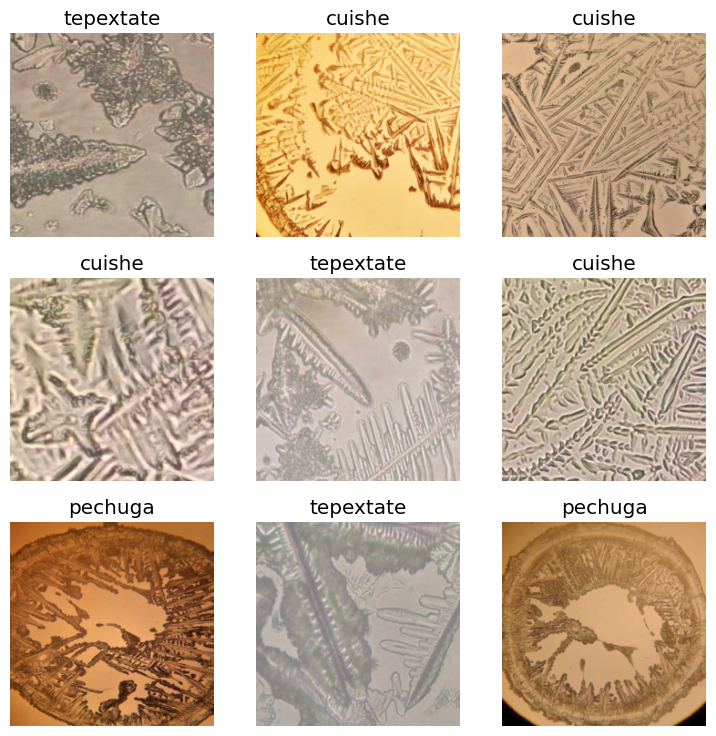

In [11]:
# TODO: Handle blank or black corners
# TODO: handle zoom not capturing much data at all
#item_transforms = [Resize(720), 
#                   CropPad(640, pad_mode='border'),
#                   RandomResizedCrop(460)]
item_transforms = [Resize(size=1080, method='Squish'), 
                  CropPad(720, pad_mode='border'),
                  RandomResizedCrop(460)]

block = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  # was 0.2
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=item_transforms,
                  batch_tfms=[
                      *aug_transforms(size=224, mult=2, max_warp=0),
                      Normalize.from_stats(*imagenet_stats)])

modded_data_loader = block.dataloaders(difficult_data_path, bs=16)
modded_data_loader.train.show_batch()

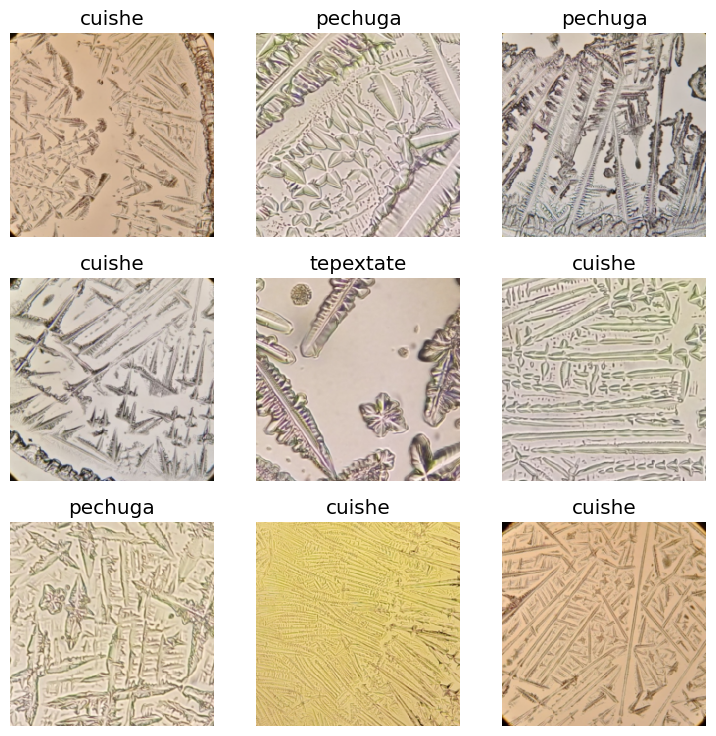

In [12]:
modded_data_loader.valid.show_batch()